# Implementing Gradient Descent in PyTorch


In [74]:
# In this we will train a simple linear regression model with two trainable parameters and explore how gradient descent works and how to implement it in PyTorch.

# Gradient Descent algorithm and its implementation in PyTorch 
# Batch Gradient Descent and its implementation in PyTorch
# Stochastic Gradient Descent and its implementation in PyTorch
# How Batch Gradient Descent and Stochastic Gradient Descent are different from each other
# How loss decreases in Batch Gradient Descent and Stochastic Gradient Descent during training

In [75]:
# Overview
# This we have been  divided in four parts; they are

# Preparing Data
# Batch Gradient Descent
# Stochastic Gradient Descent
# Plotting Graphs for Comparison

Preparing Data
To keep the model simple for illustration, we will use the linear regression problem as in the last tutorial. The data is synthetic and generated as follows:

In [76]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="True"

In [77]:
# requird libraries
import torch as th
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Creating a function f(X) with a slope of-5
X = th.arange(-5,5,0.1).view(-1,1)
func = -5*X

# adding gaussian noise to the function f(X) and saving it in Y
Y = func+0.4*th.randn(X.size())

In [79]:
# we initialized a variable X with values ranging from -5 to 5

# and created a linear function with a slope of -5

# Then, Gaussian noise is added to create the variable Y.

We can plot the data using matplotlib to visualize the pattern:



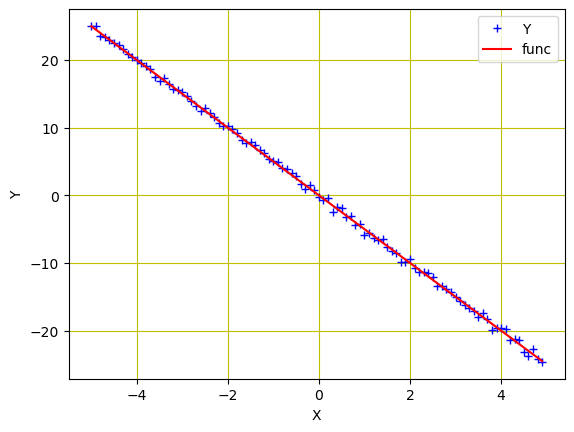

In [80]:
# Plot and visualizing the data points in blue

plt.plot(X.numpy(),Y.numpy(),"b+",label="Y")
plt.plot(X.numpy(),func.numpy(),"r",label="func")

plt.xlabel("X")
plt.ylabel("Y")

plt.legend()
plt.grid("True",c="y")
plt.show()

# Batch Gradient Descent
Now that we have created the data for our model, next we’ll build a forward function based on a simple linear regression equation. We’ll train the model for two parameters(W & B)
. We will also need a loss criterion function. Because it is a regression problem on continuous values, MSE loss is appropriate.

In [81]:
# defining the function for forward pass for prediction 
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error(MSE)
def criterion(y_pred,y):
    return th.mean((y_pred-y)**2)

Before we train our model, let’s learn about the batch gradient descent. In batch gradient descent, all the samples in the training data are considered in a single step. The parameters are updated by taking the mean gradient of all the training examples. In other words, there is only one step of gradient descent in one epoch.

# Training with Batch Gradient Descent
Let’s randomly initialize the trainable parameters 
 and 
, and define some training parameters such as learning rate or step size, an empty list to store the loss, and number of epochs for training.

In [82]:
w=th.tensor(-10.0,requires_grad=True)
b=th.tensor(-20.0,requires_grad=True)

step_size=0.1
loss_BGD=[]
n_iter=20

w.data,b.data

(tensor(-10.), tensor(-20.))

We’ll train our model for 20 epochs using below lines of code. Here, the forward() function generates the prediction while the criterion() function measures the loss to store it in loss variable. The backward() method performs the gradient computations and the updated parameters are stored in w.data and b.data.

In [83]:
for k in range(n_iter):
    
    Y_pred=forward(X)# making predictions with forward pass
    loss_fn=criterion(Y_pred,Y)# calculating the loss between original and predicted data points
    
    loss_BGD.append(loss_fn.item()) # storing the calculated loss in a list
    
    loss_fn.backward()  # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    
    # updateing the parameters after each iteration
    w.data=w.data-step_size*w.grad.data
    b.data=b.data-step_size*w.grad.data
    
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(k,loss_fn.item(),w.item(),b.item()))
    
print("Here is the how the output looks like and the parameters are updated after every epoch when we apply batch gradient descent.")


0, 	598.3512573242188, 	-1.8713865280151367, 	-11.871386528015137
1, 	226.6626434326172, 	-7.21188497543335, 	-17.211885452270508
2, 	333.3536071777344, 	-3.7031774520874023, 	-13.703178405761719
3, 	203.9022979736328, 	-6.00839900970459, 	-16.008399963378906
4, 	263.3311767578125, 	-4.493867874145508, 	-14.493868827819824
5, 	213.22723388671875, 	-5.488914966583252, 	-15.488916397094727
6, 	241.3718719482422, 	-4.835168838500977, 	-14.83517074584961
7, 	220.8203125, 	-5.264679908752441, 	-15.264681816101074
8, 	233.43325805664062, 	-4.982491493225098, 	-14.98249340057373
9, 	224.76263427734375, 	-5.16788911819458, 	-15.167891502380371
10, 	230.2935333251953, 	-5.046082973480225, 	-15.046085357666016
11, 	226.58819580078125, 	-5.126109600067139, 	-15.12611198425293
12, 	228.99171447753906, 	-5.0735321044921875, 	-15.07353401184082
13, 	227.39927673339844, 	-5.1080756187438965, 	-15.108077049255371
14, 	228.43972778320312, 	-5.085380554199219, 	-15.085381507873535
15, 	227.7536315917968

# Training with Stochastic Gradient Descent

To train our model with stochastic gradient descent, we’ll randomly initialize the trainable parameters(W & B)
 as we did for the batch gradient descent above. Here we’ll define an empty list to store the loss for stochastic gradient descent and train the model for 20 epochs. The following is the complete code modified from the previous example:



In [73]:
step_size = 0.1
loss_SGD = []
n_iter = 20

for i in range (n_iter):    
    # calculating true loss and storing it
    Y_pred = forward(X)
    # store the loss in the list
    loss_SGD.append(criterion(Y_pred, Y).tolist())

    for x, y in zip(X, Y):
      # making a pridiction in forward pass
      y_hat = forward(x)
      # calculating the loss between original and predicted data points
      loss = criterion(y_hat, y)
      # backward pass for computing the gradients of the loss w.r.t to learnable parameters
      loss.backward()
      # updateing the parameters after each iteration
      w.data = w.data - step_size * w.grad.data
      b.data = b.data - step_size * b.grad.data
      # zeroing gradients after each iteration
      w.grad.data.zero_()
      b.grad.data.zero_()
      # priting the values for understanding
      print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	107958566387712.0, 	10454563.0, 	8633532.0
0, 	1814236195979264.0, 	-31287412.0, 	17152304.0
0, 	2.7999950512062464e+16, 	129351184.0, 	-16314068.0
0, 	3.8970626278424576e+17, 	-457457536.0, 	108538848.0
0, 	4.896676683567858e+18, 	1578358528.0, 	-334029856.0
0, 	5.5303662464388825e+19, 	-5114620928.0, 	1153298816.0
0, 	5.596835418697011e+20, 	15704095744.0, 	-3578227712.0
0, 	5.056040431061339e+21, 	-45446930432.0, 	10642939904.0
0, 	4.061033143788611e+22, 	123829919744.0, 	-29661073408.0
0, 	2.887597832951084e+23, 	-316808364032.0, 	77811679232.0
0, 	1.8091461224001786e+24, 	759227547648.0, 	-191197331456.0
0, 	9.93626836709187e+24, 	-1699476406272.0, 	439239573504.0
0, 	4.757205003727253e+25, 	3542432612352.0, 	-940210257920.0
0, 	1.973241019334522e+26, 	-6852502880256.0, 	1869231816704.0
0, 	7.042781682031807e+26, 	12255030673408.0, 	-3438415970304.0
0, 	2.1465634907046044e+27, 	-20176680517632.0, 	5827788275712.0
0, 	5.539602107816566e+27, 	30434706587648.0, 	-9057913012224.0


2, 	62840768.0, 	141912.0, 	-418551.875
2, 	51824196.0, 	137592.65625, 	-419991.65625
2, 	43053140.0, 	133524.53125, 	-421303.96875
2, 	35895488.0, 	129690.109375, 	-422502.21875
2, 	30158552.0, 	126065.6015625, 	-423600.5625
2, 	25397116.0, 	122638.703125, 	-424608.46875
2, 	21568900.0, 	119387.7421875, 	-425537.3125
2, 	18289622.0, 	116308.5625, 	-426392.625
2, 	15740717.0, 	113372.640625, 	-427186.125
2, 	13319837.0, 	110598.9140625, 	-427916.0625
2, 	11821795.0, 	107917.0546875, 	-428603.71875
2, 	9512075.0, 	105449.71875, 	-429220.5625
2, 	9882902.0, 	102871.875, 	-429849.3125
2, 	4990543.5, 	100995.3515625, 	-430296.09375
2, 	16042055.0, 	97550.8359375, 	-431097.15625
2, 	3430074.0, 	99180.6328125, 	-430726.75
2, 	243611344.0, 	85133.3828125, 	-433848.375
2, 	1781833472.0, 	123968.2109375, 	-425406.03125
2, 	24733272064.0, 	-23863.8515625, 	-456859.65625
2, 	326476759040.0, 	524662.3125, 	-342583.375
2, 	4965261639680.0, 	-1659058.75, 	-788240.75
3, 	56355461267456.0, 	5847969.0,

5, 	709404852224.0, 	-3484595.25, 	-3030480.5
5, 	883085410304.0, 	-3597362.5, 	-2842535.25
5, 	1089636270080.0, 	-3701748.25, 	-2633764.0
5, 	1329562386432.0, 	-3793993.5, 	-2403150.75
5, 	1600106135552.0, 	-3869890.75, 	-2150160.25
5, 	1893878595584.0, 	-3924938.0, 	-1874923.75
5, 	2197599813632.0, 	-3954586.5, 	-1578437.625
5, 	2491463237632.0, 	-3954586.5, 	-1262750.25
5, 	2749656203264.0, 	-3921422.25, 	-931108.5
5, 	2942569807872.0, 	-3852806.5, 	-588030.125
5, 	3041083785216.0, 	-3748174.25, 	-239256.03125
5, 	3022467366912.0, 	-3609092.25, 	108448.875
5, 	2876739420160.0, 	-3439482.75, 	447667.96875
5, 	2611516276736.0, 	-3245560.5, 	770871.6875
5, 	2253052444672.0, 	-3035418.0, 	1071075.125
5, 	1842141200384.0, 	-2818257.25, 	1342526.125
5, 	1425400791040.0, 	-2603355.0, 	1581306.375
5, 	1044573913088.0, 	-2398946.25, 	1785715.125
5, 	727814701056.0, 	-2211259.75, 	1956339.25
5, 	486040764416.0, 	-2043939.875, 	2095772.5
5, 	315106328576.0, 	-1897990.625, 	2208041.25
5, 	20172

8, 	4900163420160.0, 	-5905164.0, 	-2356993.75
8, 	5555416989696.0, 	-5905164.0, 	-1885595.125
8, 	6131128205312.0, 	-5855642.0, 	-1390372.75
8, 	6561282392064.0, 	-5753182.0, 	-878072.75
8, 	6780950151168.0, 	-5596940.5, 	-357267.59375
8, 	6739436503040.0, 	-5389257.0, 	161940.90625
8, 	6414495907840.0, 	-5135988.5, 	668478.0
8, 	5823110578176.0, 	-4846415.0, 	1151100.5
8, 	5023813599232.0, 	-4532621.0, 	1599377.75
8, 	4107572084736.0, 	-4208346.5, 	2004720.75
8, 	3178330062848.0, 	-3887444.75, 	2361278.25
8, 	2329170149376.0, 	-3582212.5, 	2666510.5
8, 	1622866788352.0, 	-3301950.5, 	2921294.0
8, 	1083765293056.0, 	-3052100.75, 	3129502.0
8, 	702617878528.0, 	-2834162.75, 	3297146.5
8, 	449803681792.0, 	-2646374.0, 	3431281.25
8, 	289736884224.0, 	-2484892.25, 	3538935.75
8, 	190866980864.0, 	-2345089.5, 	3626312.5
8, 	129838407680.0, 	-2222577.0, 	3698378.75
8, 	91355742208.0, 	-2113766.5, 	3758829.0
8, 	66212409344.0, 	-2015985.75, 	3810292.5
8, 	49137270784.0, 	-1927318.0, 	385462

11, 	2.1723654641951755e+21, 	446464.0, 	898048.0
11, 	2475710720.0, 	465371.46875, 	888096.6875
11, 	2542177280.0, 	483522.65625, 	878012.6875
11, 	3137725696.0, 	502567.90625, 	866809.625
11, 	3930499840.0, 	522629.875, 	854270.875
11, 	4944665088.0, 	543725.375, 	840207.1875
11, 	6238639104.0, 	565841.1875, 	824410.1875
11, 	7887245312.0, 	588931.8125, 	806648.125
11, 	9984771072.0, 	612913.5, 	786663.375
11, 	12645642240.0, 	637653.125, 	764172.8125
11, 	16005839872.0, 	662955.9375, 	738870.0
11, 	20222355456.0, 	688552.875, 	710428.9375
11, 	25466654720.0, 	714086.125, 	678512.375
11, 	31915141120.0, 	739096.875, 	642782.75
11, 	39729102848.0, 	763015.5, 	602918.4375
11, 	49021599744.0, 	785156.3125, 	558636.8125
11, 	59815677952.0, 	804722.125, 	509722.3125
11, 	71987707904.0, 	820820.4375, 	456061.25
11, 	85203582976.0, 	832496.3125, 	397681.9375
11, 	98867445760.0, 	838784.9375, 	334795.5625
11, 	112088489984.0, 	838784.9375, 	267836.3125
11, 	123703394304.0, 	831750.625, 	1974

14, 	113216831488.0, 	3462005.25, 	6604064.5
14, 	138716725248.0, 	3596086.25, 	6529575.0
14, 	173238861824.0, 	3737601.0, 	6446331.0
14, 	217307643904.0, 	3886773.0, 	6353098.5
14, 	273457086464.0, 	4043652.5, 	6248512.0
14, 	345029214208.0, 	4208122.0, 	6131033.5
14, 	436218626048.0, 	4379844.0, 	5998940.0
14, 	552229273600.0, 	4558193.0, 	5850315.5
14, 	699394031616.0, 	4742178.5, 	5683056.0
14, 	885240102912.0, 	4930353.0, 	5494881.5
14, 	1118432395264.0, 	5120713.5, 	5283369.5
14, 	1408482017280.0, 	5310600.5, 	5046010.5
14, 	1765141381120.0, 	5496602.5, 	4780293.0
14, 	2197297037312.0, 	5674482.0, 	4483827.5
14, 	2711239000064.0, 	5839140.5, 	4154510.75
14, 	3308224774144.0, 	5984648.5, 	3790740.25
14, 	3981402701824.0, 	6104369.0, 	3391671.25
14, 	4712358739968.0, 	6191201.0, 	2957512.0
14, 	5468074803200.0, 	6237969.0, 	2489833.75
14, 	6199274635264.0, 	6237969.0, 	1991866.875
14, 	6841696780288.0, 	6185655.5, 	1468734.125
14, 	7321712328704.0, 	6077421.0, 	927560.875
14, 	7566

17, 	839437123584.0, 	3790517.75, 	3296544.5
17, 	1044955725824.0, 	3913185.5, 	3092098.25
17, 	1289367060480.0, 	4026735.75, 	2864997.75
17, 	1573272289280.0, 	4127079.75, 	2614137.5
17, 	1893412110336.0, 	4209640.5, 	2338935.0
17, 	2241027637248.0, 	4269521.0, 	2039533.75
17, 	2600418410496.0, 	4301772.5, 	1717017.5
17, 	2948151115776.0, 	4301772.5, 	1373613.875
17, 	3253662908416.0, 	4265696.5, 	1012855.625
17, 	3481941049344.0, 	4191056.75, 	639656.375
17, 	3598515175424.0, 	4077238.25, 	260261.3125
17, 	3576478564352.0, 	3925945.5, 	-117970.28125
17, 	3404041027584.0, 	3741445.0, 	-486971.15625
17, 	3090208784384.0, 	3530497.0, 	-838551.0
17, 	2666037772288.0, 	3301905.0, 	-1165111.125
17, 	2179807838208.0, 	3065678.25, 	-1460394.625
17, 	1686673686528.0, 	2831908.75, 	-1720138.625
17, 	1236043038720.0, 	2609553.75, 	-1942493.625
17, 	861222862848.0, 	2405389.25, 	-2128097.75
17, 	575133777920.0, 	2223379.0, 	-2279773.0
17, 	372864024576.0, 	2064616.25, 	-2401898.25
17, 	238702329

# Plotting Graphs for Comparison
Now that we have trained our model using batch gradient descent and stochastic gradient descent, let’s visualize how the loss decreases for both the methods during model training. So, the graph for batch gradient descent looks like this.



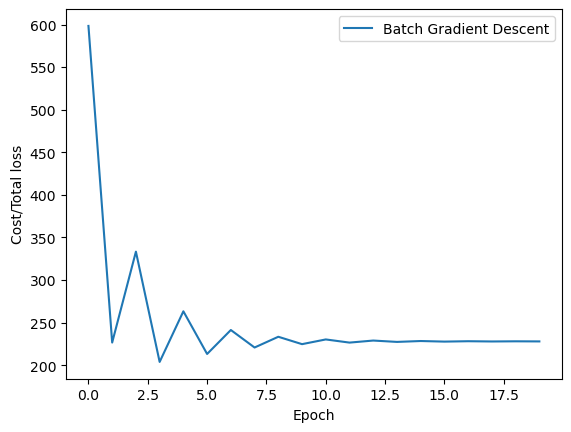

In [84]:
plt.plot(loss_BGD,label="Batch Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Cost/Total loss")
plt.legend()
plt.show()

Similarly, here is how the graph for stochastic gradient descent looks like.


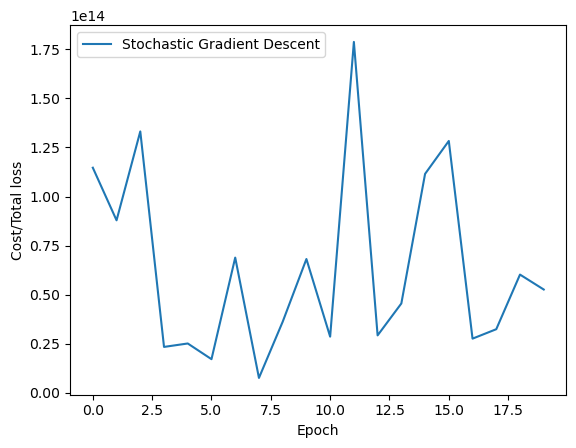

In [85]:
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

As we can see, the loss smoothly decreases for batch gradient descent. On the other hand, you’ll observe fluctuations in the graph for stochastic gradient descent. As mentioned earlier, the reason is quite simple. In batch gradient descent, the loss is updated after all the training samples are processed while the stochastic gradient descent updates the loss after every training sample in the training data.

In [86]:
# Summary
# In this  we learned about the Gradient Descent, some of its variations, and how to implement them in PyTorch. Particularly, you learned about:

# Gradient Descent algorithm and its implementation in PyTorch
# Batch Gradient Descent and its implementation in PyTorch
# Stochastic Gradient Descent and its implementation in PyTorch
# How Batch Gradient Descent and Stochastic Gradient Descent are different from each other
# How loss decreases in Batch Gradient Descent and Stochastic Gradient Descent during training